## classifier method search

premise: use a looped grid search to explore the accuracy metrics of classfiers

In [9]:
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, RandomTreesEmbedding, BaggingClassifier
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import pandas as pd

In [10]:
m2_pipeline = pd.read_csv('binned_pipeline.csv')


## testing data for colinearity among features

In [11]:
m2_pipeline.corr(numeric_only=True)

,Unnamed: 0,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,sum_change,length,surge_targets_met_pct,label
Unnamed: 0,1.000000,-0.074820,-0.036954,-0.077781,0.017377,0.010504,0.062203,-0.002245,-0.040018
precursor_buy_cap_pct_change,-0.074820,1.000000,0.218251,0.825875,0.082502,0.129882,-0.047718,0.007553,0.000636
precursor_ask_cap_pct_change,-0.036954,0.218251,1.000000,0.340009,0.092719,-0.092942,0.021504,-0.020821,-0.016212
precursor_bid_vol_pct_change,-0.077781,0.825875,0.340009,1.000000,0.011741,-0.006089,-0.025773,0.005475,-0.001806
precursor_ask_vol_pct_change,0.017377,0.082502,0.092719,0.011741,1.000000,-0.053649,0.070062,0.020034,0.024472
sum_change,0.010504,0.129882,-0.092942,-0.006089,-0.053649,1.000000,-0.184258,-0.024879,-0.088098
length,0.062203,-0.047718,0.021504,-0.025773,0.070062,-0.184258,1.000000,0.070419,0.027821
surge_targets_met_pct,-0.002245,0.007553,-0.020821,0.005475,0.020034,-0.024879,0.070419,1.000000,0.817659
label,-0.040018,0.000636,-0.016212,-0.001806,0.024472,-0.088098,0.027821,0.817659,1.000000


<Axes: >

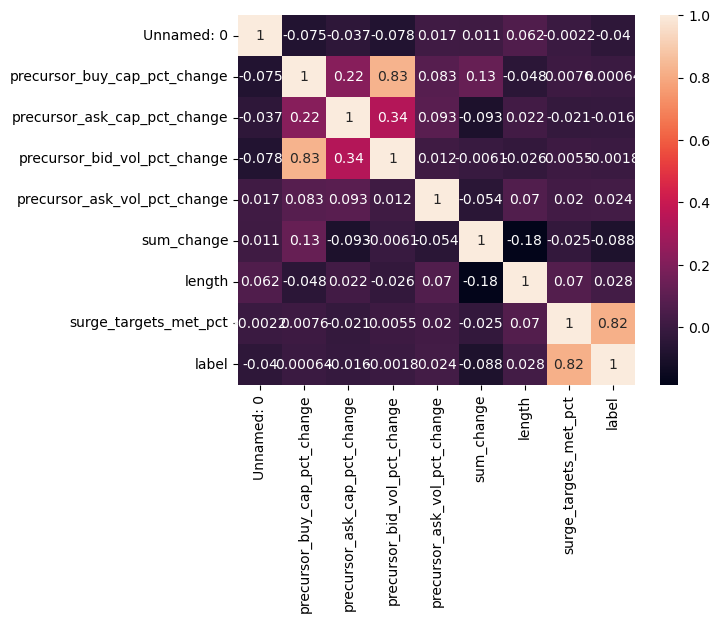

In [12]:
import pandas as pd
import seaborn as sns

# Load the dataset into a pandas dataframe

# Calculate the correlation matrix
corr_matrix = m2_pipeline.corr(numeric_only=True)

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)


XGB, GBM, CAT, FASTAI, NN_TORCH, LR, RF, XT

In [13]:
def deliver_models(): #deliver a matrix of classifier definitions
    random_state =42
    return [
        ('HistGradientBoostingClassifier',  HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_iter=100, \
                                                                               max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, \
                                                                               l2_regularization=0.0, max_bins=255, categorical_features=False, \
                                                                               monotonic_cst=None, interaction_cst=None, warm_start=False, \
                                                                               early_stopping='auto', scoring='loss', validation_fraction=0.1, \
                                                                               n_iter_no_change=10, tol=1e-07, verbose=0, random_state=42, \
                                                                               class_weight=None )),
    ('GradientBoostingClassifier', GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, \
                                                       criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, \
                                                       min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, \
                                                       init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, \
                                                       warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=100,  criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,\
                                                      min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, \
                                                      min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, \
                                                      random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,\
                                                      max_samples=None)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=100,  criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, \
                                                  min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,\
                                                  bootstrap=False, oob_score=False, n_jobs=None, random_state=42, verbose=0, warm_start=False,\
                                                  class_weight=None, ccp_alpha=0.0, max_samples=None)),
    ('RandomTreesEmbedding', RandomTreesEmbedding(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, \
                          max_leaf_nodes=None, min_impurity_decrease=0.0, sparse_output=True, n_jobs=None, random_state=42, verbose=0, \
                          warm_start=False)),
    ('BaggingClassifier', BaggingClassifier(estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True,\
                                            bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=42, \
                                            verbose=0, base_estimator='deprecated')),
    ('CatBoostEncoder', ce.CatBoostEncoder(verbose=0, cols='bin', drop_invariant=False, return_df=True, handle_unknown='value', handle_missing='value', \
                        random_state=42, sigma=None, a=1)),
    ('RidgeCV',RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, \
                       alpha_per_target=False)),
    ('LassoCV',LassoCV( eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, \
                verbose=False, n_jobs=None, positive=False, random_state=42, selection='cyclic')),
    ('SVC', SVC( C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, \
                class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42))]

In [14]:
m2_pipeline.dtypes

Unnamed: 0                        int64
precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
sum_change                      float64
length                            int64
surge_targets_met_pct           float64
label                             int64
dtype: object

### utilize the same feature composition as used in step 2

clustering setup, per 'step 2'

set m2_pipeline features to the set, below to do a classifier search

In [15]:
keepable = ['precursor_buy_cap_pct_change', 
            'precursor_ask_cap_pct_change',
            'precursor_bid_vol_pct_change', 
            'precursor_ask_vol_pct_change',
            'sum_change',
            'length']

In [16]:

# Splitting the dataframe into features and labels
# X = m2_pipeline.drop(columns=['label'])
y = m2_pipeline['label']
X = m2_pipeline[keepable]
# Performing the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize all numeric columns

# Define the classifiers and their respective hyperparameters
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    # ce.CatBoostEncoder(),
    # RandomTreesEmbedding(),
    RidgeCV(),
    LassoCV(),
    # SVC()
]

params = {
    'RandomForestClassifier': {'n_estimators': [10, 100, 1000], 'max_depth': [None, 10, 100]},
    'GradientBoostingClassifier': {'n_estimators': [10, 100, 1000], 'max_depth': [None, 10, 100]},
    'HistGradientBoostingClassifier': {'learning_rate': [0.1, 0.01], 'max_iter': [100, 200]},
    'ExtraTreesClassifier':{'n_estimators': [10, 100, 1000], 'max_depth': [None, 10, 100]},
    # 'RandomTreesEmbedding':{'n_estimators': [10, 100, 1000], 'max_depth': [None, 10, 100]},
    'BaggingClassifier':{ 'n_estimators':[10],  'random_state':[42]},
    # 'CatBoostEncoder':{'cols':['label'], 'drop_invariant':False, 'return_df':False, 'random_state':[42]},
    'RidgeCV':{'alphas':[0.1, 1.0, 10.0]},
    'LassoCV':{ 'eps':[0.001, 0.01, .1], 'n_alphas':[100,200],  'max_iter':[100,200,300,1000]},
    # 'SVC':{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}
comparative = []
# Perform the grid search
for clf in classifiers:
    name = clf.__class__.__name__
    if name in params:
        grid_search = GridSearchCV(clf, params[name], cv=5)
        grid_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        accuracy = grid_search.score(X_test, y_test)
        dict = {"classifier":name, "best_params":grid_search.best_params_, "accuracy":accuracy}
        comparative.append(dict)
dg = pd.DataFrame(comparative) #display grid

/Users/stefanbund/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 1000}


/Users/stefanbund/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for GradientBoostingClassifier: {'max_depth': 10, 'n_estimators': 1000}


/Users/stefanbund/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for HistGradientBoostingClassifier: {'learning_rate': 0.01, 'max_iter': 100}


/Users/stefanbund/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for ExtraTreesClassifier: {'max_depth': 10, 'n_estimators': 100}


/Users/stefanbund/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for BaggingClassifier: {'n_estimators': 10, 'random_state': 42}
Best parameters for RidgeCV: {'alphas': 1.0}
Best parameters for LassoCV: {'eps': 0.001, 'max_iter': 100, 'n_alphas': 100}


In [17]:
dg

,classifier,best_params,accuracy
0,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 1000}",0.540140
1,GradientBoostingClassifier,"{'max_depth': 10, 'n_estimators': 1000}",0.525305
2,HistGradientBoostingClassifier,"{'learning_rate': 0.01, 'max_iter': 100}",0.556719
3,ExtraTreesClassifier,"{'max_depth': 10, 'n_estimators': 100}",0.522688
4,BaggingClassifier,"{'n_estimators': 10, 'random_state': 42}",0.498255
5,RidgeCV,{'alphas': 1.0},0.006901
6,LassoCV,"{'eps': 0.001, 'max_iter': 100, 'n_alphas': 100}",0.007070


In [18]:
rfc = RandomForestClassifier(max_depth=100, n_estimators=1000)
gbc = GradientBoostingClassifier(max_depth= 10, n_estimators= 1000)
hgbc = HistGradientBoostingClassifier(learning_rate= 0.01, max_iter= 100)
etc = ExtraTreesClassifier(max_depth= None, n_estimators= 1000)
bc = BaggingClassifier(n_estimators= 10, random_state= 42)
    # ce.CatBoostEncoder(),
    # RandomTreesEmbedding(),
# rvc = RidgeCV(alphas=1.0) # estimator vs classifier
# lvc = LassoCV(eps= 0.001, max_iter= 100, n_alphas= 100)
    # SVC()

## Voting Classifier

In [19]:
import shap #this library would take 30 hours to explain the above model, not to be used. would function on one tree, better
from sklearn.ensemble import  VotingClassifier 
from sklearn.model_selection import cross_val_score
X = m2_pipeline.drop(columns=['label'])
y = m2_pipeline['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define VotingClassifier 
vc = VotingClassifier(estimators=[('rfc',rfc),('gbc',gbc),('hgbc',hgbc),('etc',etc),('bc',bc)], voting='soft') 
rfc.fit(X_train,y_train)
gbc.fit(X_train,y_train)
hgbc.fit(X_train,y_train)
etc.fit(X_train,y_train)
bc.fit(X_train,y_train)
# rvc.fit(X_train,y_train)
# lvc.fit(X_train,y_train)
vc.fit(X_train,y_train)
# runnable = [('rfc',rfc),('gbc',gbc),('hgbc',hgbc),('etc',etc),('bc',bc),('rvc',rvc),('lvc',lvc),('ensemble', vc)]
# #fit all
for clf, label in zip([rfc,gbc,hgbc,etc,bc,vc], ['RandomForestClassifier', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'ExtraTreesClassifier',\
                                                    'BaggingClassifier','Voting']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
# explainer = shap.KernelExplainer(vc.predict_proba, X_train) # Define explainer
# shap_values = explainer.shap_values(X_test) # Compute SHAP values for test set 
# shap.summary_plot(shap_values[1], X_test) # Plot summary plot of SHAP values for each feature 

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
The least populated class in y has only 2 members, which is less than n_splits=5.


Accuracy: 0.98 (+/- 0.00) [RandomForestClassifier]


The least populated class in y has only 2 members, which is less than n_splits=5.


Accuracy: 1.00 (+/- 0.00) [GradientBoostingClassifier]


The least populated class in y has only 2 members, which is less than n_splits=5.


Accuracy: 0.99 (+/- 0.00) [HistGradientBoostingClassifier]


The least populated class in y has only 2 members, which is less than n_splits=5.


Accuracy: 0.97 (+/- 0.01) [ExtraTreesClassifier]
Accuracy: 1.00 (+/- 0.00) [BaggingClassifier]


The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.


Accuracy: 1.00 (+/- 0.00) [Voting]


## Model Explainability

SHAP explains how one model, bundled into the VotingClassifier, predicts a feature in y_train. Usually one model is best suited to predicting one feature, and is used to do so.

In [20]:
#save this thing to .pkl format

import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(vc, f)